# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.layers import Input, Dense

plt.style.use('seaborn')

# Data Visualization

In [3]:
df = pd.read_csv('XAU_USD_Historical_Data_2010_2023.csv', parse_dates=['Date'])
df = df.sort_values('Date')

In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
1,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
3,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
4,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%
...,...,...,...,...,...,...,...
3559,2023-09-01,"1,938.80","1,940.19","1,953.44","1,934.59",NaN,-0.05%
3560,2023-09-04,"1,938.19","1,940.49","1,946.42","1,936.15",NaN,-0.03%
3561,2023-09-05,"1,925.81","1,938.59","1,939.13","1,925.22",NaN,-0.64%
3562,2023-09-06,"1,916.28","1,926.16","1,929.80","1,914.80",NaN,-0.50%


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3564 entries, 0 to 3563
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3564 non-null   datetime64[ns]
 1   Price     3564 non-null   object        
 2   Open      3564 non-null   object        
 3   High      3564 non-null   object        
 4   Low       3564 non-null   object        
 5   Vol.      0 non-null      float64       
 6   Change %  3564 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 222.8+ KB


In [13]:
# We are only interested in the Date & Price of the gold. We can drop the other columns. 
df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True)

In [14]:
# We need to change the type ot the data to appropriate type
df['Date'] = pd.to_datetime(df['Date'])

df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float')

In [15]:
df.set_index('Date', inplace=True)

In [16]:
df

,Price
Date,
2010-01-01,1097.35
2010-01-04,1120.40
2010-01-05,1119.05
2010-01-06,1138.90
2010-01-07,1132.30
...,...
2023-09-01,1938.80
2023-09-04,1938.19
2023-09-05,1925.81


In [22]:
"""
ax = df.plot(x = df.index, y= 'Price')
ax.set_title('Gold price over time')
ax.set_xlabel('Date')
ax.set_ylabel('Gold Price')
plt.show()

"""

def display_plot(data, title):
    data.plot(
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
    plt.title(f'{title}', fontsize="xx-large")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize="xx-large")
    plt.show()

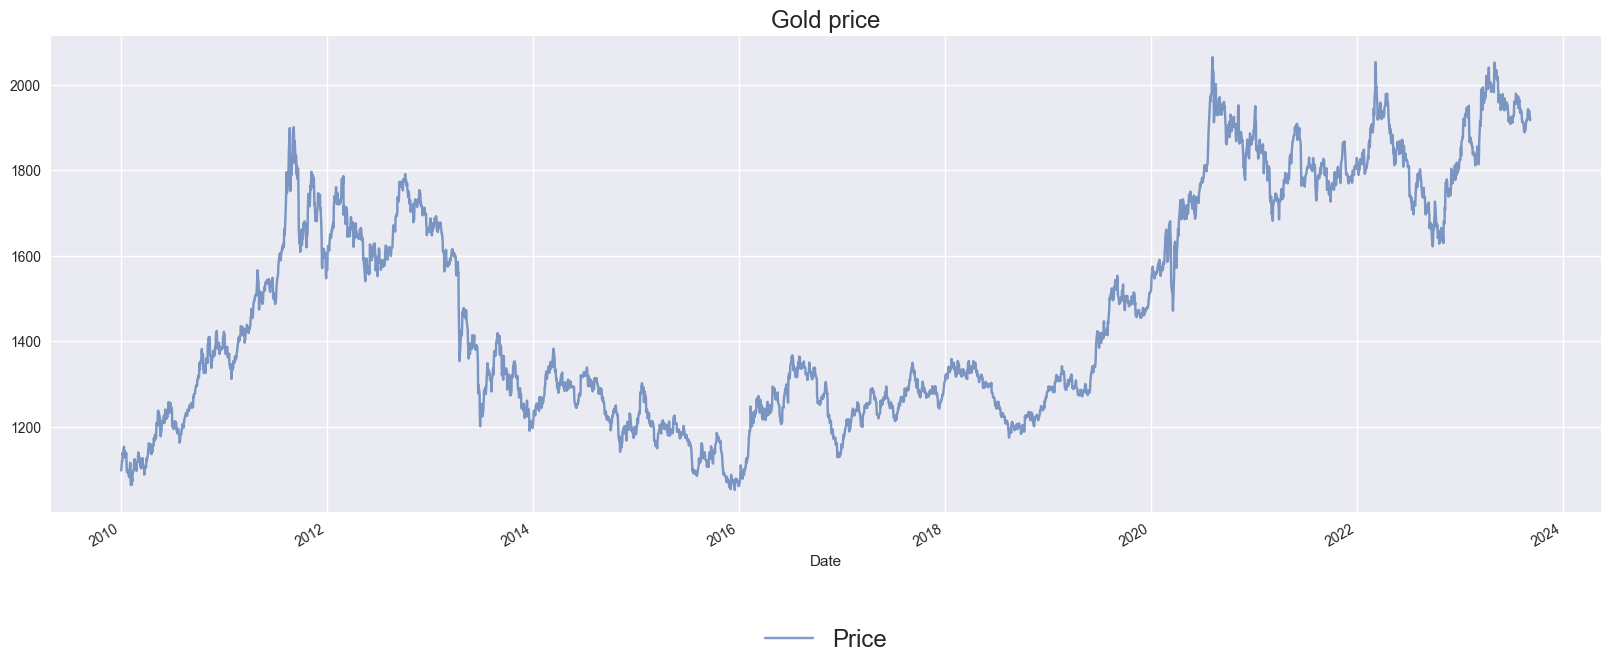

In [23]:
display_plot(df['Price'], "Gold price")

# Splitting the Data

In [25]:
shifted_rows = 100
df['prediction'] = df[['Price']].shift(-shifted_rows)
df['prediction']

Date
2010-01-01    1177.15
2010-01-04    1192.05
2010-01-05    1201.10
2010-01-06    1210.90
2010-01-07    1212.10
               ...   
2023-09-01        NaN
2023-09-04        NaN
2023-09-05        NaN
2023-09-06        NaN
2023-09-07        NaN
Name: prediction, Length: 3564, dtype: float64

In [26]:
# Training Data for X

training_data = np.array(df[['Price']][:-shifted_rows])
training_data

array([[1097.35],
       [1120.4 ],
       [1119.05],
       ...,
       [2004.93],
       [1993.26],
       [2004.34]])

In [28]:
# Training data for y

y = (df['prediction'].values)[:-shifted_rows]   #except shifted rows
y

array([1177.15, 1192.05, 1201.1 , ..., 1925.81, 1916.28, 1919.19])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(training_data, y, test_size=0.2, random_state=42, shuffle=False)

# Linear Regression

In [38]:
linReg = LinearRegression()
linReg.fit(x_train, y_train)
linReg_confidence = linReg.score(x_test, y_test)

linReg_confidence

-1.1000650303269452

In [39]:
# ??????????????

future_values = np.array(df[['Price']][-shifted_rows:])
linReg_prediction = linReg.predict(future_values)

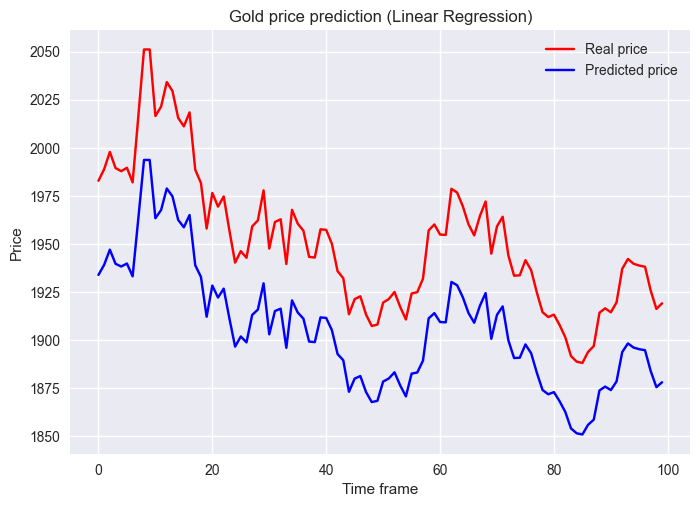

In [40]:
plt.plot(future_values, 'red', label='Real price')
plt.plot(linReg_prediction, 'blue', label='Predicted price')
plt.xlabel('Time frame')
plt.ylabel('Price')
plt.title('Gold price prediction (Linear Regression)')
plt.legend()
plt.show()

# Neural Network Model

In [35]:
NN_model = Sequential()

#input layer
NN_model.add(Dense(128, kernel_initializer='normal', input_dim=x_train.shape[1], activation='relu'))

#the Hidden layers
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

#the output layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

#compile the network:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               256       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165,121
Trainable params: 165,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
70/70 [==============================

In [42]:
future_values = np.array(df[['Price']][-shifted_rows:])
NN_prediction = NN_model.predict(future_values)

4/4 [==============================] - 0s 3ms/step


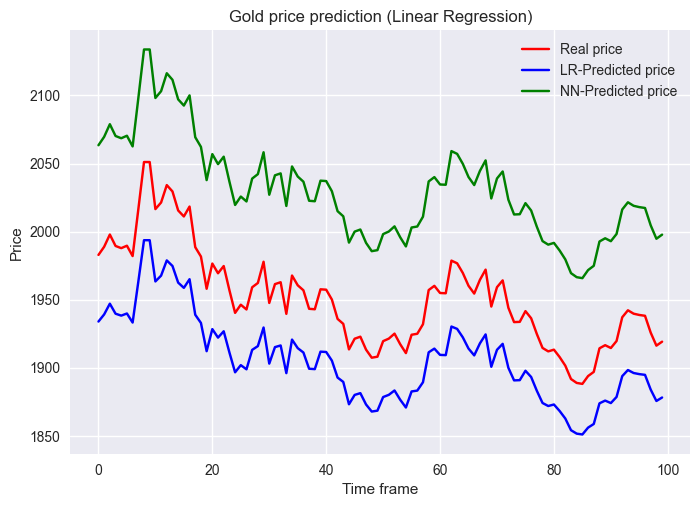

In [43]:
plt.plot(future_values, 'red', label='Real price')
plt.plot(linReg_prediction, 'blue', label='LR-Predicted price')
plt.plot(NN_prediction, 'green', label='NN-Predicted price')

plt.xlabel('Time frame')
plt.ylabel('Price')
plt.title('Gold price prediction (Linear Regression)')
plt.legend()
plt.show()